In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [5]:
data = pd.read_csv('/content/Phishing_Legitimate_full.csv')

In [6]:
data.drop("id", axis =1, inplace = True)

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [9]:
data.CLASS_LABEL.value_counts()

0    4996
1    4585
Name: CLASS_LABEL, dtype: int64

In [26]:
X= data.drop(['CLASS_LABEL'], axis =1)
y = data.CLASS_LABEL

In [27]:
X

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [28]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 9581, dtype: int64

In [36]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [37]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [39]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [18]:
data.drop(constant_columns,axis=1, inplace = True)



In [40]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation(X, 0.8
                            )
len(set(corr_features))

0

In [42]:
corr_features


set()

In [24]:
data.drop(corr_features,axis=1, inplace = True)


In [43]:
data

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,0,0,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,0,0,0,1,0,0,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import time

# Assuming X and y are your data and target variables

# Create a RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)

# Create an RFECV object
rfecv = RFECV(estimator=rfc, step=1, cv=10, scoring='accuracy')

# Record the start time
start_time = time.time()

# Fit the RFECV model
rfecv.fit(X, y)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the optimal number of features and the elapsed time
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Time taken: {elapsed_time} seconds")



Optimal number of features: 32
Time taken: 366.99126410484314 seconds


In [33]:
print(np.where(rfecv.support_ == False)[0])


[ 6  7 11 16 20 32 33 34 38 39]


In [34]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


In [35]:
X

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,NumNumericChars,...,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0.000000,0,0,0,0,-1,1
1,3,1,3,144,0,0,2,0,2,41,...,0,0,0,0.000000,0,0,0,0,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0.000000,0,0,0,0,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,0.000000,1,1,0,0,1,-1
4,3,0,4,46,0,0,0,0,0,2,...,0,1,0,0.000000,1,0,1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,2,9,...,0,0,0,0.000000,0,0,0,0,0,1
9996,2,1,4,59,1,0,0,0,0,0,...,0,0,0,0.129032,0,0,1,0,0,1
9997,2,1,4,57,0,0,0,0,0,6,...,0,0,0,0.056338,0,0,0,0,0,1
9998,3,1,1,49,0,0,0,0,1,3,...,1,0,0,0.000000,0,0,1,0,0,1


In [44]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 9581, dtype: int64

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.06714648, 0.0039866 , 0.04834294, 0.03820806, 0.11718852,
       0.0122447 , 0.0109888 , 0.01009902, 0.03053374, 0.12482966,
       0.00669894, 0.01547134, 0.01226581, 0.001373  , 0.01948206,
       0.05996063, 0.04105468, 0.01765158, 0.46491534, 0.28234996,
       0.00056046, 0.05833796, 0.        , 0.        , 0.01156252,
       0.23366114, 0.13211433, 0.08209231, 0.02787556, 0.00199701,
       0.11853513, 0.2144552 ])

In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

PctExtHyperlinks                      0.464915
PctExtResourceUrls                    0.282350
PctNullSelfRedirectHyperlinks         0.233661
PctExtNullSelfRedirectHyperlinksRT    0.214455
FrequentDomainNameMismatch            0.132114
NumNumericChars                       0.124830
ExtMetaScriptLinkRT                   0.118535
NumDash                               0.117189
SubmitInfoToEmail                     0.082092
NumDots                               0.067146
PathLength                            0.059961
InsecureForms                         0.058338
PathLevel                             0.048343
NumSensitiveWords                     0.041055
UrlLength                             0.038208
NumQueryComponents                    0.030534
IframeOrFrame                         0.027876
HostnameLength                        0.019482
EmbeddedBrandName                     0.017652
RandomString                          0.015471
IpAddress                             0.012266
NumDashInHost

In [52]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['NumDots', 'NumDash', 'NumNumericChars', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'SubmitInfoToEmail',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT'],
      dtype='object')

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20)


In [55]:
x_test = x_test[['NumDots', 'NumDash', 'NumNumericChars', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'SubmitInfoToEmail',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']]


In [56]:
x_test

,NumDots,NumDash,NumNumericChars,PctExtHyperlinks,PctExtResourceUrls,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
670,3,0,0,0.000000,0.363636,1.000000,0,0,0,-1
2916,3,1,4,1.000000,1.000000,0.000000,1,0,-1,-1
4229,2,1,2,0.923077,1.000000,0.000000,1,0,-1,-1
1586,2,1,0,0.000000,0.642857,1.000000,0,0,0,-1
7985,2,18,8,0.258065,0.370370,0.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
5870,2,3,3,0.148649,0.015625,0.000000,0,0,0,1
6955,3,0,0,0.062500,0.029851,0.000000,0,1,1,1
2343,2,1,0,0.000000,0.000000,1.000000,0,0,1,-1
5307,1,6,11,0.040816,0.460000,0.000000,0,0,0,1


In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)


In [60]:
num_features = x_train.select_dtypes(exclude ="object")

In [62]:
x_train.shape, y_train.shape

((7664, 10), (7664,))

In [66]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library


In [67]:

# Create a function to evaluate different models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

+------------------------------+------------+-------------+----------+------------+--------------------+
| Model                        |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+==============================+============+=============+==========+============+====================+
| Logistic Regression          |   0.885759 |    0.862766 | 0.900111 |   0.881043 | [[887 129]         |
|                              |            |             |          |            |  [ 90 811]]        |
+------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier     |   0.972353 |    0.973214 | 0.967814 |   0.970506 | [[992  24]         |
|                              |            |             |          |            |  [ 29 872]]        |
+------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifier |   0.963485 |    0.9570

+--------------------------+------------+-------------+----------+------------+--------------------+
| Model                    |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+==========================+============+=============+==========+============+====================+
| Random Forest Classifier |   0.983829 |    0.980624 | 0.985931 |    0.98327 | [[975  18]         |
|                          |            |             |          |            |  [ 13 911]]        |
+--------------------------+------------+-------------+----------+------------+--------------------+

The model with the highest accuracy is: Random Forest Classifier (Accuracy: 0.9838)


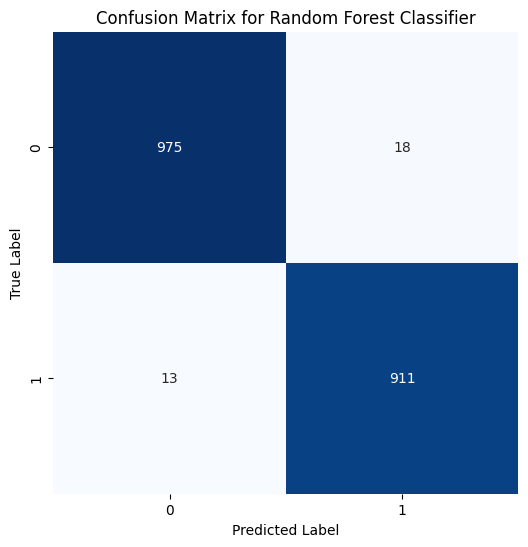

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a function to evaluate different models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {

    'Random Forest Classifier': RandomForestClassifier()

}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

plt.figure(figsize=(6, 6))
sns.heatmap(results[max_accuracy_index][-1], annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming you have already defined your pipeline 'pipe' and X, y
kfold_validation=KFold(4)

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5 # You can adjust the number of folds as needed
accuracy_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy Scores for Each Fold:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Fold {i + 1}: {accuracy:.4f}")

mean_accuracy = accuracy_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.3f}")


Accuracy Scores for Each Fold:
Fold 1: 0.9765
Fold 2: 0.9823
Fold 3: 0.9823
Fold 4: 0.9598
Fold 5: 0.9713
Mean Accuracy: 0.974


In [78]:
pipe

Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index([], dtype='object')),
                                                 ('num_tnf', StandardScaler(),
                                                  Index(['NumDots', 'NumDash', 'NumNumericChars', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'SubmitInfoToEmail',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [77]:
 pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])
